In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [68]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


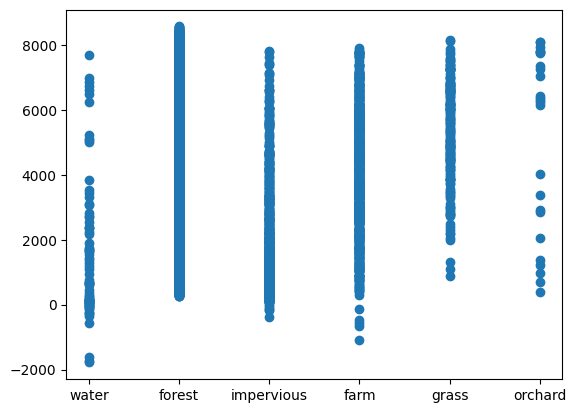

In [ ]:

plt.scatter(df['class'], df['20150602_N'])
df.isnull().sum()

In [ ]:
# Detecting and removing outliers

class_name = list(df['class'].unique())
col_name = list(df.columns)
col_name.pop(0)
col_name.pop(1)

for c in class_name :
    subset = df[df['class'] == c].loc[:, col_name].dropna()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1

    inlier = ~((subset < (q1 - 1.5*iqr)) | (subset > (q3 + 1.5*iqr))).any(axis = 1)

    df = df.drop(index = subset[~inlier].index)



# print(df.isnull().sum())
# plt.scatter(df['class'], df['20150602_N'])


In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn import preprocessing
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column 
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

#Imputing and Scaling the data
imputer = KNNImputer(n_neighbors = 2, weights = 'distance')
scaler = preprocessing.StandardScaler(with_std = False, with_mean = False).fit(X)
X = pd.DataFrame(imputer.fit_transform(X))
X_scaled = (scaler.transform(X))

print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter= 2000
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'farm': 0, 'forest': 1, 'grass': 2, 'impervious': 3, 'orchard': 4, 'water': 5}
              precision    recall  f1-score   support

        farm       0.81      0.80      0.80       163
      forest       0.98      0.99      0.99      1215
       grass       0.64      0.39      0.48        36
  impervious       0.87      0.90      0.88       130
     orchard       0.75      0.50      0.60         6
       water       0.83      0.75      0.79        20

    accuracy                           0.95      1570
   macro avg       0.81      0.72      0.76      1570
weighted avg       0.94      0.95      0.94      1570



In [72]:
test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_data.shape
test_data.isnull().sum()

Unnamed: 0    0
ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [ ]:
ID=test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [74]:
scaler1 = preprocessing.StandardScaler(with_std = False, with_mean = False).fit(test_data)
test_data_scaled = scaler1.transform(test_data)
y_test = model.predict(test_data_scaled)

In [75]:
y_test

array([1, 1, 1, ..., 3, 3, 3])

In [76]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'impervious', 'impervious',
       'impervious'], dtype=object)

In [77]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [78]:
result['class'].unique()

array(['forest', 'water', 'orchard', 'farm', 'impervious', 'grass'],
      dtype=object)

In [ ]:
result.to_csv("sub11_8.csv", index=False)